In [132]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, f1_score
import joblib

#from xgboost import XGBRegressor

In [133]:
mainDF = pd.read_csv(r'C:\Users\raadr\OneDrive\Desktop\AflAnalysis-\data\interim\H&AsesData.csv')
mainDF.columns.tolist()
#drop null values
mainDF = mainDF.dropna() #think about how to deal with this 

In [134]:
#Print column names
print(mainDF.columns.tolist())

['GameId', 'Year', 'Round', 'Date', 'MaxTemp', 'MinTemp', 'Rainfall', 'Venue', 'StartTime', 'Attendance', 'HomeTeam', 'HomeTeamScoreQT', 'HomeTeamScoreHT', 'HomeTeamScore3QT', 'HomeTeamScoreFT', 'HomeTeamScore', 'AwayTeam', 'AwayTeamScoreQT', 'AwayTeamScoreHT', 'AwayTeamScore3QT', 'AwayTeamScoreFT', 'AwayTeamScore', 'homePosition', 'homePoints', 'homePercentage', 'awayPosition', 'awayPoints', 'awayPercentage', 'Home Odds', 'Away Odds', 'previous_game_home_win_loss', 'previous_game_away_win_loss', 'previous_game_home_position', 'previous_game_home_points', 'previous_game_home_percentage', 'previous_game_away_position', 'previous_game_away_points', 'previous_game_away_percentage', 'Day', 'Month', 'MinutesSinceMidnight', 'HomeProbability', 'AwayProbability']


In [135]:
X = mainDF[['Year', 'Round', 'MaxTemp', 'Rainfall', 'Venue', 'HomeTeam', 'AwayTeam', 'Day', 'MinutesSinceMidnight', 'HomeProbability', 'previous_game_home_position','previous_game_away_position', 'previous_game_home_win_loss', 'previous_game_away_win_loss']]
Y = mainDF['Attendance']

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.10, random_state=42)

In [137]:
#Normalise Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions for Random Search
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = GradientBoostingRegressor()

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Search
print("Random Search - Best Hyperparameters:", random_search.best_params_)

# Train the model with the best hyperparameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

Random Search - Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}


GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                          n_estimators=200)

In [139]:
joblib.dump(best_model, r'C:\Users\raadr\OneDrive\Desktop\AflAnalysis-\models\GradientBoosting.pkl')

['C:\\Users\\raadr\\OneDrive\\Desktop\\AflAnalysis-\\models\\GradientBoosting.pkl']

In [140]:
loaded_model = joblib.load(r'C:\Users\raadr\OneDrive\Desktop\AflAnalysis-\models\GradientBoosting.pkl')

In [141]:
y_pred = loaded_model.predict(X_test)

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 31372368.87659935
Mean Absolute Error: 4109.962933654446
R-squared: 0.8840984890848986


In [143]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
1649,9022,5633.732863
229,10552,14205.948659
1684,38492,41753.436521
886,51892,48701.937111
1323,52475,52700.893017
...,...,...
1608,30702,34700.502795
1556,40663,46818.309473
1403,40837,44845.070992
1815,32586,28430.868104


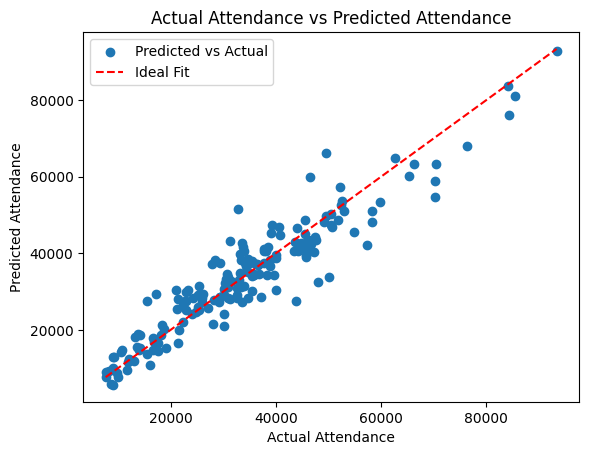

In [144]:
# Plot results
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual Attendance vs Predicted Attendance')
plt.legend()
plt.show()


In [ ]:
#plot feature importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Cat Boosting

In [145]:
from catboost import CatBoostRegressor

In [165]:
#mainDF = pd.read_csv(r'C:\Users\raadr\OneDrive\Desktop\AflAnalysis-\data\interim\proCatH&ASes.csv')
mainDF.columns.tolist()
#drop null values
mainDF = mainDF.dropna()

In [166]:
#categorical_features = ['Venue', 'HomeTeam', 'AwayTeam', 'Day', 'StartTime']
cbr = CatBoostRegressor(loss_function='RMSE', random_state=42)

In [167]:
X = mainDF[['Year', 'Round', 'MaxTemp', 'Rainfall', 'Venue', 'HomeTeam', 'AwayTeam', 'Day', 'MinutesSinceMidnight', 'HomeProbability', 'previous_game_home_position','previous_game_away_position', 'previous_game_home_win_loss', 'previous_game_away_win_loss']]
Y = mainDF['Attendance']

In [168]:
#Normalise Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.10, random_state=42)

c:\Users\raadr\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 15385.2063158	total: 3.97ms	remaining: 791ms
1:	learn: 14627.7272782	total: 6.31ms	remaining: 625ms
2:	learn: 13920.2832459	total: 10.2ms	remaining: 668ms
3:	learn: 13317.9092052	total: 12.8ms	remaining: 626ms
4:	learn: 12750.9088728	total: 15.2ms	remaining: 595ms
5:	learn: 12375.3291413	total: 17.6ms	remaining: 569ms
6:	learn: 11940.8208842	total: 20.3ms	remaining: 559ms
7:	learn: 11641.7605702	total: 23.1ms	remaining: 556ms
8:	learn: 11325.9804718	total: 25.5ms	remaining: 541ms
9:	learn: 10973.6583127	total: 27.3ms	remaining: 518ms
10:	learn: 10665.3955192	total: 29.3ms	remaining: 503ms
11:	learn: 10369.0676836	total: 31.3ms	remaining: 490ms
12:	learn: 10129.0645328	total: 33.3ms	remaining: 479ms
13:	learn: 9929.9181533	total: 35.5ms	remaining: 471ms
14:	learn: 9749.6384075	total: 37.7ms	remaining: 465ms
15:	learn: 9556.2938678	total: 39.9ms	remaining: 458ms
16:	learn: 9414.0827696	total: 42.2ms	remaining: 454ms
17:	learn: 9213.0268635	total: 44ms	remaining: 445ms
18:	learn

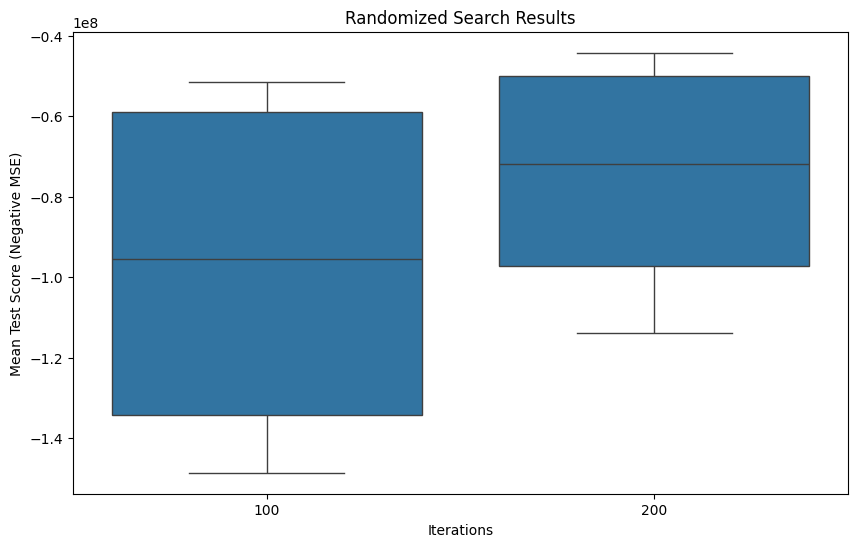

In [170]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define the scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Define the parameter distributions for Random Search
param_dist = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(cbr, param_distributions=param_dist, n_iter=10, cv=5, scoring=scorer, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Search
print("Random Search - Best Hyperparameters:", random_search.best_params_)
# Plot the results of the Randomized Search
results = pd.DataFrame(random_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.boxplot(x='param_iterations', y='mean_test_score', data=results)
plt.xlabel('Iterations')
plt.ylabel('Mean Test Score (Negative MSE)')
plt.title('Randomized Search Results')
plt.show()

In [171]:
joblib.dump(random_search, r'C:\Users\raadr\OneDrive\Desktop\AflAnalysis-\models\CatBoosting.pkl')

['C:\\Users\\raadr\\OneDrive\\Desktop\\AflAnalysis-\\models\\CatBoosting.pkl']

In [172]:
y_pred = random_search.predict(X_test)

In [154]:

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

#RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 43327035.55330476
Mean Absolute Error: 4825.829196388728
Root Mean Squared Error: 6582.327517930475
R-squared: 0.8425605871510748


In [173]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
1649,9022,8108.907383
229,10552,19394.368057
1684,38492,39349.196395
886,51892,46032.284178
1323,52475,48471.820876
...,...,...
1608,30702,33913.158922
1556,40663,44840.169316
1403,40837,42540.499177
1815,32586,30675.269292


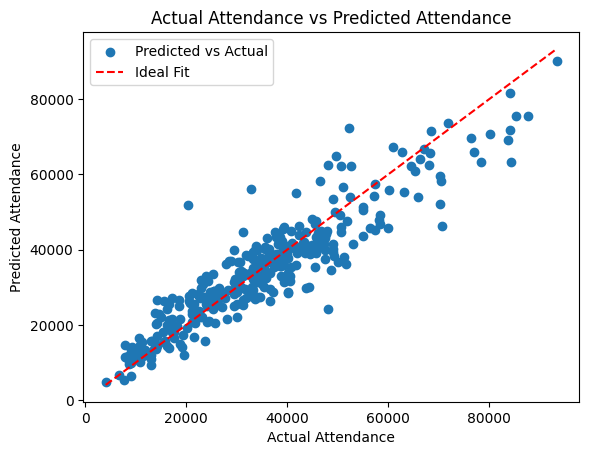

In [156]:
# Plot results
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual Attendance vs Predicted Attendance')
plt.legend()
plt.show()


# Light GBM

In [158]:
%pip install lightgbm


In [159]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [174]:
X = mainDF[['Year', 'Round', 'MaxTemp', 'Rainfall', 'Venue', 'HomeTeam', 'AwayTeam', 'Day', 'MinutesSinceMidnight', 'HomeProbability', 'previous_game_home_position','previous_game_away_position', 'previous_game_home_win_loss', 'previous_game_away_win_loss']]
Y = mainDF['Attendance']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.10, random_state=42)

In [175]:
#Normalise Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
from sklearn.model_selection import RandomizedSearchCV
#categorical_features = ['Venue', 'HomeTeam', 'AwayTeam', 'Day', 'StartTime']

#for col in categorical_features:
    #X_train[col] = X_train[col].astype('category')
    #X_test[col] = X_test[col].astype('category')

# LightGBM model
lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', boosting_type='gbdt')

# Define the parameter grid to search
param_dist = {
    'num_leaves': np.arange(8, 64),
    'learning_rate': np.logspace(-4, -1, 10),
    'max_depth': np.arange(3, 15),
    'feature_fraction': np.linspace(0.5, 1.0, 6),
    'bagging_fraction': np.linspace(0.5, 1.0, 6),
    'bagging_freq': np.arange(1, 8),
    'lambda_l1': np.logspace(-5, -1, 5),
    'lambda_l2': np.logspace(-5, -1, 5),
}

# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(lgb_model, param_distributions=param_dist, 
                                   n_iter=50,  # Number of parameter combinations to try
                                   scoring='neg_root_mean_squared_error',  # RMSE is the score metric
                                   cv=3,  # Cross-validation folds
                                   verbose=2,  # Prints the progress
                                   n_jobs=-1,  # Uses all cores
                                   random_state=42)

# We pass categorical_feature directly during model training inside the randomized search
# Ensure the categorical features are passed during training
def fit_model_with_categorical_features(X_train, y_train, categorical_features):
    # Create dataset for LightGBM
    train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
    return train_data

# Define a custom fit function that includes the categorical feature information
random_search.fit(X_train, y_train)

# Output the best parameters found
print("Best hyperparameters found: ", random_search.best_params_)

# Get the best model from the random search
best_lgb_model = random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] bagging_fraction i

In [178]:
joblib.dump(random_search, r'C:\Users\raadr\OneDrive\Desktop\AflAnalysis-\models\LightGBM.pkl')


['C:\\Users\\raadr\\OneDrive\\Desktop\\AflAnalysis-\\models\\LightGBM.pkl']

In [179]:

# Make predictions on the test set
y_pred = best_lgb_model.predict(X_test)

# Calculate the RMSE on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Final RMSE on test set: {mse}')

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
Final RMSE on test set: 38645163.528807044


In [180]:

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 38645163.528807044
Mean Absolute Error: 4439.835034584549
R-squared: 0.8572300083500926


In [181]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
1649,9022,9179.440862
229,10552,18214.000047
1684,38492,41615.211679
886,51892,44703.399668
1323,52475,50421.782975
...,...,...
1608,30702,35119.101960
1556,40663,40160.713017
1403,40837,41825.248695
1815,32586,30410.702631


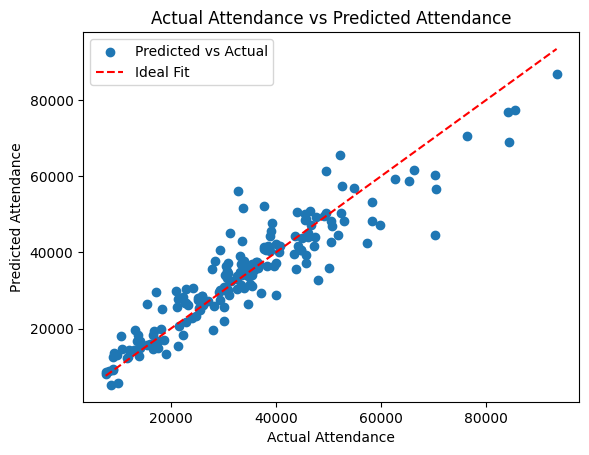

In [182]:
# Plot results
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual Attendance vs Predicted Attendance')
plt.legend()
plt.show()
